# Britter-McQuaid Dense Gas Plume Model

The Britter-McQuaid model is based on the *Workbook on the Dispersion of Dense Gases*, by R.E. Ritter and J. McQuaid, which uses a series of correlations relating maximum center-line concentrations to downwind distances based upon actual releases. The model of the plume is a series of rectangular slices with constant, average, concentration throughout -- giving a "top-hat" model. Points outside the defined plume are assumed to have zero concentration.

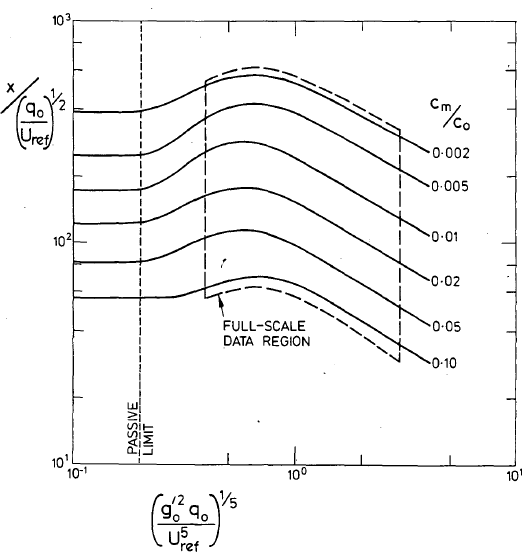

## Example

This scenario is adapted from CCPS *Guidelines for Consequence Analysis of Chemical Releases* CCPS, 1999, pg 122.

This example is based on the Burro LNG dispersion results, in which LNG was released at ground-level with the following parameters:
- release temperature: -162°C
- release rate: 0.23 m³/s (liquid)
- release duration: 174 s
- windspeed at 10m: 10.9 m/s
- LNG liquid density (at release conditions): 425.6 kg/m³
- LNG gas density (at release conditions): 1.76 kg/m³

and we assume the atmosphere was otherwise at ambient conditions of 298K and 1atm.

In [1]:
using GasDispersion

The first step is to define the *LNG* substance, using the given parameters and otherwise assuming the substance is Methane.

In [2]:
s = Substance(name = :LNG,
              gas_density = 1.76,
              liquid_density = 425.6,
              reference_temp=(273.15-162),
              reference_pressure=101325.0,
              boiling_temp = 111.6, # Methane, NIST Webbook
              latent_heat = 509880.0,  # J/kg, Methane
              gas_heat_capacity = 2240.0, # J/kg/K, Methane
              liquid_heat_capacity = 3349.0) # J/kg/K, Methane

Substance: LNG 


The release is defined for us for most parameters - for completeness I am assuming the vent diameter was 1m and estimating a jet velocity from that - and implicitly we are assuming all of the liquid evaporates. The release is denser than air because the vapour is at the boiling point of LNG (-162°C).

In [3]:
ṁ = 0.23*425.6 # liquid spill rate times liquid density
Q = ṁ/1.76 # gas volumetric flowrate: mass flowrate divided by gas density
A = (π/4)*(1)^2 # release area, assuming a diameter of 1m.
u = Q/A

r = Release( mass_rate = ṁ, # liquid spill rate times liquid density
             duration = 174,
             diameter = 1.0,
             velocity = u,
             height = 0.0,
             pressure = 101325.0,
             temperature = (273.15-162),
             fraction_liquid = 0.0)

Release conditions:
    ṁ: 97.888 kg/s 
    Δt: 174 s 
    d: 1.0 m 
    u: 70.81526849717933 m/s 
    h: 0.0 m 
    P: 101325.0 Pa 
    T: 111.14999999999998 K 
    f_l: 0.0  


We assume dry air (0% relative humidity) with a windspeed of 10.9 m/s at 10 m (the default height for windspeed measurements), for completeness we further assume the atmospheric stability class was "F"

In [4]:
a = DryAir(windspeed=10.9, temperature=298, stability=ClassF)

Atmospheric conditions:
    P: 101325 Pa 
    T: 298 K 
    Rs: 287.0500676 J/kg/K 
    u: 10.9 m/s 
    h: 10 m 
    stability: ClassF  


We can now put together the scenario and generate the solution.

In [5]:
scn = Scenario(s,r,a)
pl = plume(scn, BritterMcQuaidPlume);

In [6]:
# centerline concentration at 367m downwind of release
c₁ = pl(367,0,0)

0.05071175952024219

From the reference we expect the concentration to be ~0.05(v/v)

The difference here is possibly due to the example calculations not carrying all decimal places, as well as the imprecision that comes with using correlations (especially by pencil and paper).